# Machine learning for jewwelry price optimisation

## Methodology 
CRISP-DM (Cross industry standard process for data mining)
1. Business understanding
2. Data Understanding
3. Data Preperation
4. Dta Modelling
5. Model Evaluation
6. Model Deployment
They do not neccessarily follow a linear progression as some phases might be reapeated

### preperation steps 
* Missing data 
* Outliers
* Inconsistent values
* Data Inbalance
* Feature correlations


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# set visualization theme
sns.set()

In [2]:
# import data
data = pd.read_csv("Jewelry_Dataset.csv")

In [3]:
# peek at the data
data.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


### Observation
The data has no column names they need to be fixed using the information from the data dictionary

In [4]:
# create columns 
data.columns =[
    "Order_Datetime",
    "Order_ID",
    "product_id",
    "SKU_Quantity", 
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
   "Target_Gender",
    "Main_Color",
     "Main_Gem",
    "Main_Metal",
]

In [5]:
data.head()

,Order_Datetime,Order_ID,product_id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Gem,Main_Metal
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [6]:
# Check for missing values
data.isnull().sum()

Order_Datetime        0
Order_ID              0
product_id            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Gem           5462
Main_Metal        34058
dtype: int64

In [7]:
# check the shape
data.shape

(95910, 13)

In [8]:
# feature cardinality
data.nunique()

Order_Datetime    74504
Order_ID          74759
product_id         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Gem              3
Main_Metal           30
dtype: int64

In [9]:
data['Price_USD'].nunique()

3166

In [10]:
# Applying the Averaging Test on Price_USD
try:
    avg_price = data['Target_Gender'].mean()
    print(f"Mean Price: {avg_price}")
    print("✅ Averaging Test Passed: This suggests a regression problem.")
except TypeError:
    print("❌ Cannot average the values: This suggests a classification problem.")

❌ Cannot average the values: This suggests a classification problem.


### Since your target ("Price_USD") has thousands of unique values, it suggests that the variable is continuous, which is a key characteristic of regression problems.

### Observation
1. lots of missing data
2. feature cardinality shows SKU quantity is only 1 , it might not be useful for this analysis, this is because a feature that has only one unique value is a constant that cannot change, there will be nothing more to learn about that feature.

In [11]:
# Data description
data.describe()

,Order_ID,product_id,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [12]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   product_id      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Gem        90448 non-null  object 
 12  Main_Metal      61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [13]:
# Duplicate values
data.duplicated().sum()

2589

In [14]:
# Features with a cardinality of 1(invariant features)
invariant_features = data.nunique()[data.nunique() == 1].index.tolist()
invariant_features

['SKU_Quantity']

In [15]:
# check for label distribution
data['Price_USD'].skew()

18.95906072625981

### Note 
This is a regression problem not a classification problem so we are not looking for class inbalance in our labels rather for the skewness in our label distribution , because a skewed price makes it 
because a skewed distribution makes it difficult to learn infor about other pricesas it focuses only on a sunbset of prices 

### Skewness
Skewness measures the asymmetry of a distribution.
A skew value of 0 means the data is perfectly symmetrical (normal distribution).
Positive skew (right-skewed, > 0):
A skewness value of 18.96 is extremely high, suggesting that most of the data is concentrated on the left, with a long tail extending to the right.
This happens in datasets where a few extreme values (outliers) are pulling the mean higher.
Negative skew (left-skewed, < 0):
Most values are on the right, with a tail extending to the left.


In [16]:
# price kurtosis
data['Price_USD'].kurtosis()

1054.8979068506155

Kurtosis measures the "tailedness" or peakedness of a distribution. It helps identify how heavily the tails of a dataset differ from a normal distribution.

* Kurtosis = 3 (Mesokurtic) → Normal distribution (Gaussian)
* Kurtosis < 3 (Platykurtic) → Flatter distribution with thin tails (few or no outliers)
* Kurtosis > 3 (Leptokurtic) → Peaked distribution with fat tails (more extreme values/outliers)

  A kurtosis of 1054.90 is abnormally high and suggests extreme outliers are dominating your dataset.

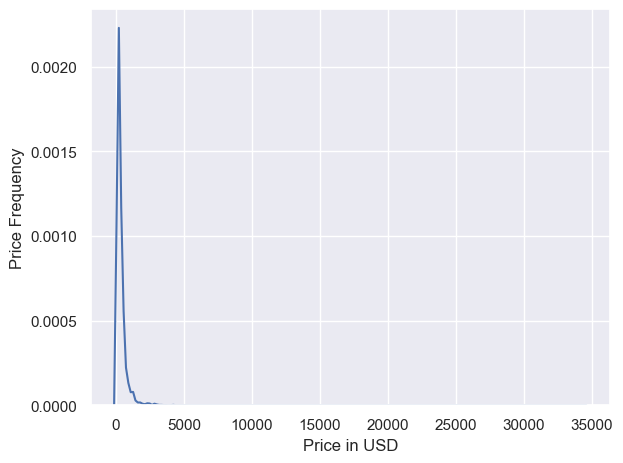

In [17]:
# Visualize price distribution
plt.Figure(figsize = (10, 8))

sns.kdeplot(data = data, x="Price_USD")
plt.xlabel("Price in USD")
plt.ylabel("Price Frequency")

plt.tight_layout()

plt.show(); plt.close()

# Observations 
The  dataset is highly positively skewed.
There are extreme outliers or an imbalanced target variable.
The mean is much higher than the median, meaning a few high values dominate the dataset as also shown by the kurtosis.

In [18]:
# Target gender analysis
data['Target_Gender'].value_counts()

Target_Gender
f    47379
m      364
Name: count, dtype: int64

In [19]:
# Target gender analysis in %
data['Target_Gender'].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

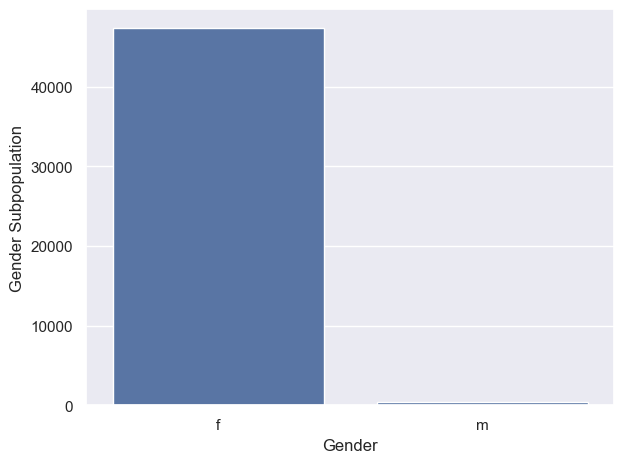

In [20]:
# visualise target gender
plt.Figure(figsize = (10, 8))

sns.countplot(data = data, x="Target_Gender")
plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")


plt.tight_layout()

plt.show(); plt.close()

In [21]:
# Jewelry category analysis
data["Category"].value_counts()

Category
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

### Observation
shows corrupted data because  having decimal places like this 253.77    doesnt make sence that a jewelry category is in decimal places 

In [22]:
data["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [23]:
# Lets elimate evry number or category that doesnt makes sence by extracting actual jewelry category
categories = data["Category"].unique().tolist()
categories = [ c for c in categories if isinstance(c, str) and "jewelry" in c ]
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [ ]:
'''#this loop is same as 
filtered_categories = []  # Initialize an empty list

for c in categories:  # Loop through each element in categories
    if isinstance(c, str) and "jewelry" in c:  # Check if c is a string and contains "jewelry"
        filtered_categories.append(c)  # Add to the new list if the condition is met

categories = filtered_categories  # Assign filtered list back to categories
categories

In [24]:
# pick out authentic data based on categories
real_categories = data.loc[data["Category"].isin(categories)]

In [25]:
# percentage of missing values 
100 * data.isnull().sum()/len(data)

Order_Datetime     0.000000
Order_ID           0.000000
product_id         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Gem           5.694922
Main_Metal        35.510374
dtype: float64

In [26]:
# check % missing values for the real categories 
100 * real_categories.isnull().sum()/len(real_categories)

Order_Datetime     0.000000
Order_ID           0.000000
product_id         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_Gem           0.110617
Main_Metal        24.232519
dtype: float64

### Observation 
checking for missing values on the curated real_categories shows a better presentation of how much of the missing values was based on
having wrong meaningless category in our dataset

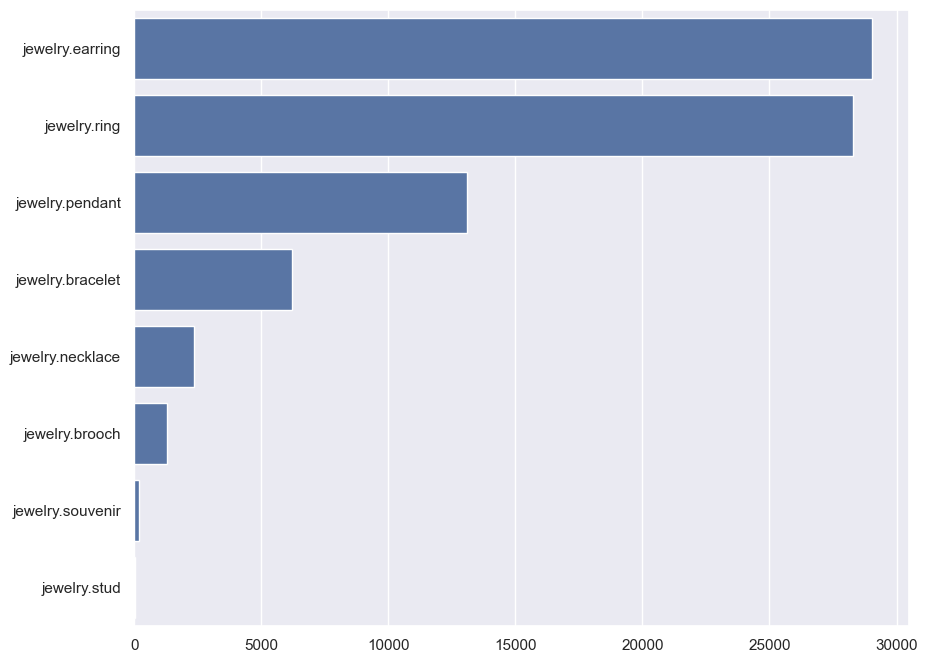

In [27]:
# visualize hewelry categories 
subdata = real_categories['Category']. value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize = (10, 8))

sns.barplot( x=counts, y= jewelry_categories)

plt.show(); plt.close()

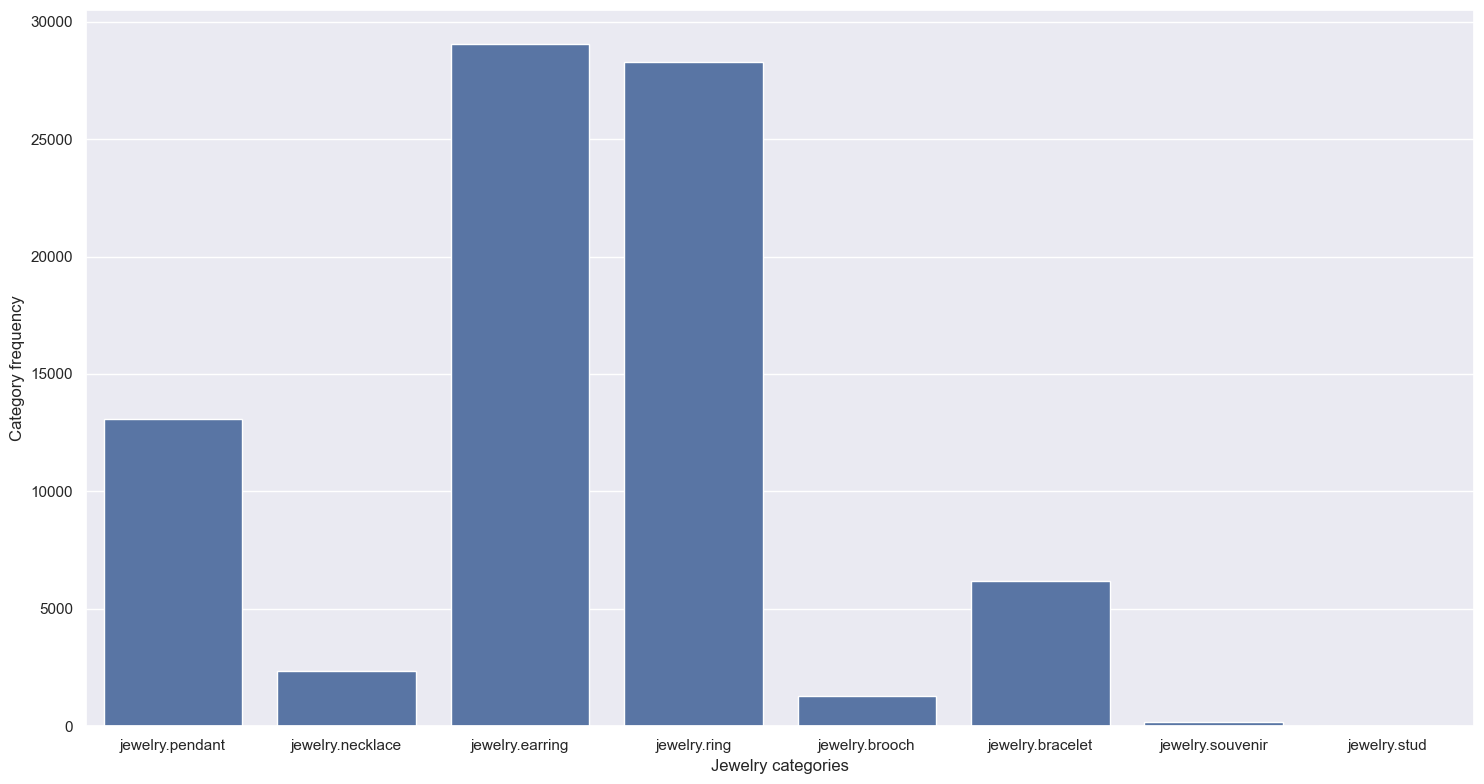

In [28]:
# categories countplot  to do same visualization
# visualize jewelry categories 
plt.figure(figsize = (15, 8))

sns.countplot( data = real_categories, x = "Category")

plt.xlabel("Jewelry categories")
plt.ylabel('Category frequency')

plt.tight_layout()

plt.show(); plt.close()

## Bivariate analysis

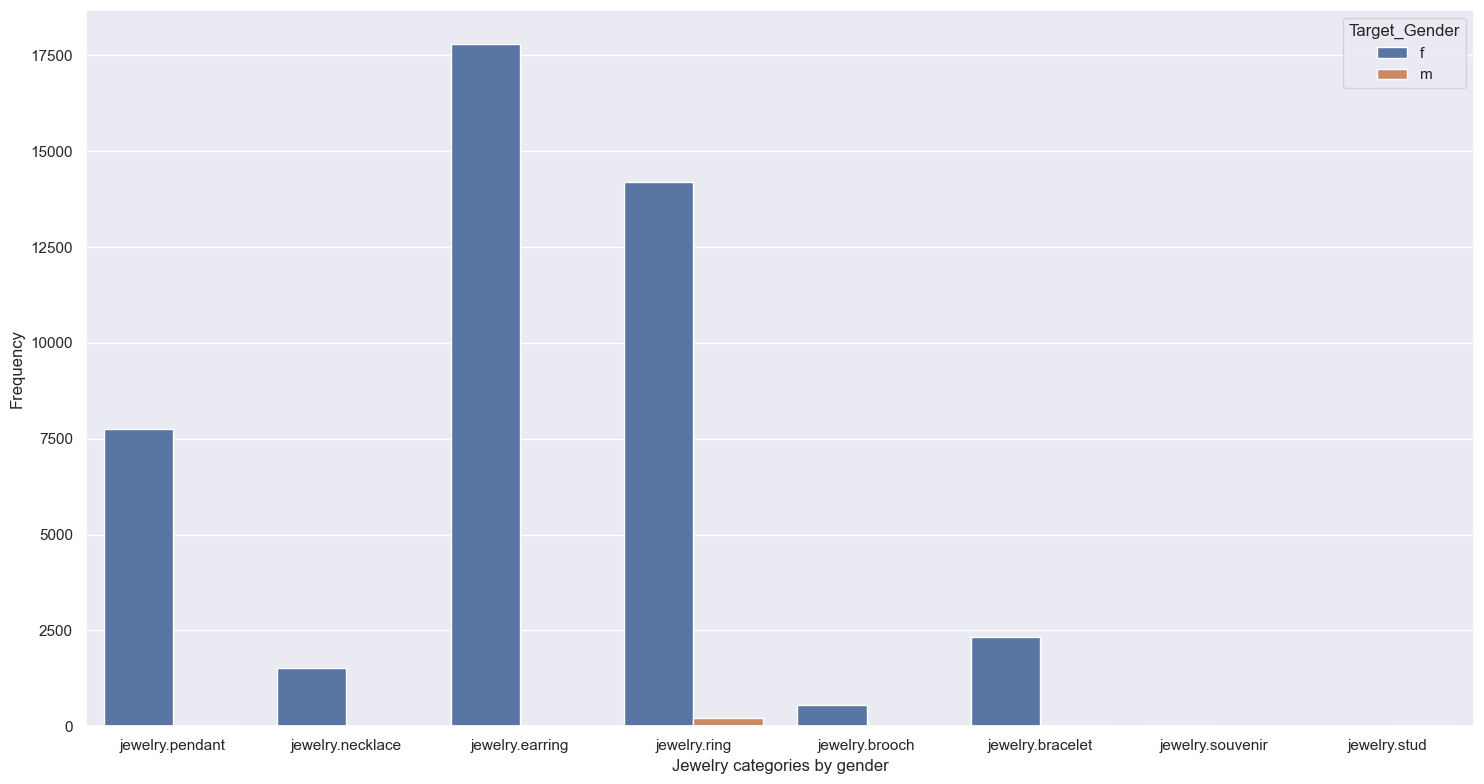

In [29]:
# Jewelry category by gender
plt.figure(figsize= (15, 8))
sns.countplot(data = real_categories, x= "Category", hue="Target_Gender")
plt.xlabel ('Jewelry categories by gender')
plt.ylabel( "Frequency")

plt.tight_layout()

plt.show(); plt.close()

In [30]:
# Gender skew in original data
# Target gender analysis in %
data['Target_Gender'].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

In [31]:
# Target gender analysis in % for real categories
real_categories['Target_Gender'].value_counts(normalize = True)

Target_Gender
f    0.994434
m    0.005566
Name: proportion, dtype: float64

### observation 
The gender disparity is worse for the real_categories 

In [32]:
#Encode jewelry categories to ensure correlation analysis
encoded, category_code = pd.factorize(real_categories['Category'])
real_categories.loc[:, 'Category'] = encoded

In [33]:
# Encode gender to ensure correlation analysis
encoded, category_code = pd.factorize(real_categories['Target_Gender'])
real_categories.loc[:, 'Target_Gender'] = encoded

In [34]:
# Encode gems
encoded, category_code = pd.factorize(real_categories['Main_Gem'])
real_categories.loc[:, 'Main_Gem'] = encoded

In [35]:
# Encode color
encoded, category_code = pd.factorize(real_categories['Main_Color'])
real_categories.loc[:, 'Main_Color'] = encoded

In [36]:
### Encode metal
encoded, category_code = pd.factorize(real_categories['Main_Metal'])
real_categories.loc[:, 'Main_Metal'] = encoded

In [37]:
# Check the data
real_categories.head()

,Order_Datetime,Order_ID,product_id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Gem,Main_Metal
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


In [38]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  80458 non-null  object 
 1   Order_ID        80458 non-null  int64  
 2   product_id      80458 non-null  int64  
 3   SKU_Quantity    80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category        80458 non-null  object 
 6   Brand_ID        76991 non-null  float64
 7   Price_USD       80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Target_Gender   80458 non-null  object 
 10  Main_Color      80458 non-null  object 
 11  Main_Gem        80458 non-null  object 
 12  Main_Metal      80458 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 8.6+ MB


### Observation
after encoding the categorical variables, the data we are working with was checked, irrelevant columns were dropped and spearman's correlation was used because we are dealing with mostly categorical values if it were to be numerical we will use pearsons...from data.infor() we can clearly see that the columns we encoded are still objects

In [39]:
# Feature correlation
correlations =  real_categories.drop(labels = ['Order_Datetime', 'Order_ID', 'User_ID','product_id'],axis = 1 ). corr(method ="spearman")

In [40]:
correlations

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Gem,Main_Metal
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Gem,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Metal,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


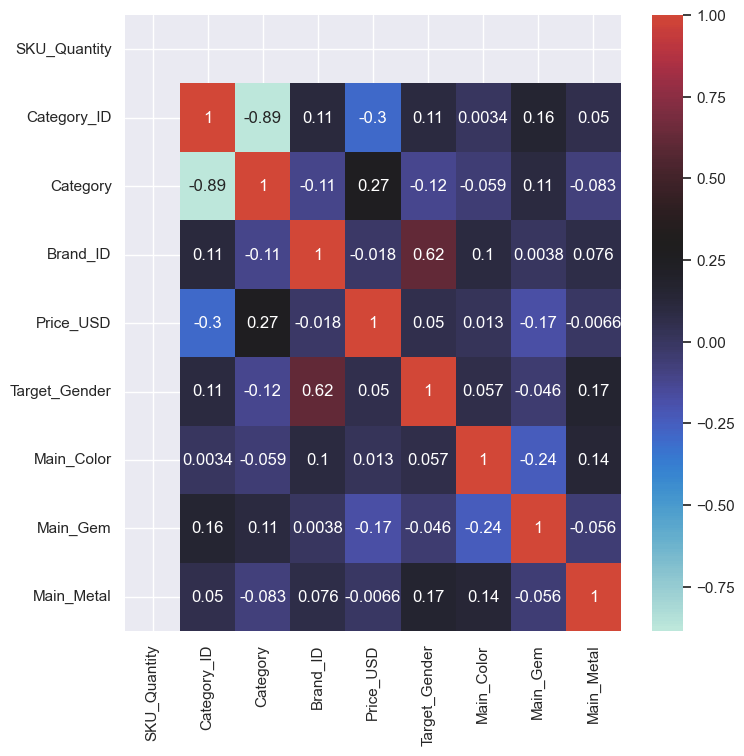

In [120]:
# visualise correltion
plt.figure (figsize= (8, 8))
sns.heatmap(correlations,annot = True, center= .3 )

plt.show(); plt.close()

In [42]:
# set correlation limits  since our correlation values are very low
upper = 1
lower = .2
# Explicitly obtain correlated features
correlated_columns = {
    column: correlations[(correlations[column] > lower) & (upper > correlations [column])].index.tolist()
    for column in correlations.columns 
}
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Gem': [],
 'Main_Metal': []}

## Observation
-  Data Implications
Implied by our findings above, we can say the following:

1. Missing values: There are a lot of missing values in the dataset. This may be fixed either by value imputation or missingness encoding.

2. Data corruption: Some variables (e.g., jewelry_category) contain corrupt values.

3. Rare values: Some features have some values that occur rarely. A prime instance of this is the Target_Gender column, where the male gender is rarely represented. Sometimes, these are data issues. Other times, like in this case, this can be a true reflection of the distribution from which the data is generated.

4. Low cardinality or feature invariance: The SKU_Quantity feature only has one unique value (e.g., 1). This feature provides no new information.

5. Target skew: The target variable is highly right-skewed. This can present an issue during training.

6. Correlation: For the most part, the features exhibit low multicollinearity, hence ensuring feature independence. However, the target variable exhibits a low correlation with the independent variables.

## Data Preparation
Based on the Data Implications discovered prior, the following steps will be experimented upon for the data preparation stage.

Missing Values: The missing values will be treated via an algorithmic method, SimpleImputer.

Feature Encoding: The categorical features will be encoded.

Redundant Features: Certain features will be eliminated for a number of reasons. These are:

A. SKU_Quantity: Feature invariance
B. Order_ID: Simple identifier; has no real-world influence on jewellery price.
C. Product_ID: Same as Order_ID.
D. Order_Datetime: Avoid data leakage; would likely not be available in real-world.
Target Skew: The target variable is strongly right-skewed. This can be an issue when learning a mapping from the data space to the label space. This issue will be fixed using the TransformedTargetRegressor utility.

NOTE: Most of the data preparation steps will be carried out via the use of the Pipeline class from Scikit-learn. The Pipeline object allows us to chain transformers and estimators sequentially for use as one composite object.

High-level Steps:
1. Eliminate less useful features.
2. Extract records with actual categories.
3. Encode categorical features (if required).
4. Account for target skew.
5. Fix missing values.


In [43]:
# Columns to eliminate
columns_to_eliminate = [
    "SKU_Quantity",
    "Order_ID",
    "product_id",
    "User_ID",
    "Category_ID",
     "Order_Datetime",	
]


In [44]:
# Drop features we dont need
data.drop(labels = columns_to_eliminate, axis = 1, inplace = True)

In [45]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Gem,Main_Metal
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [47]:
# Eliminate the unrealistic categories
data = data.loc[data["Category"]. isin(categories), :]

In [48]:
data.shape

(80458, 7)

In [49]:
# Seperate features from labels 
X, y, = data.drop(labels = ["Price_USD"], axis=1), data["Price_USD"]

In [65]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .1)

## Data Modelling
1. Linear regression
2. Extremely Random Forest (ExtraTrees)
3. Adoptive Boosting(AdaBoost)
4. Catboost
   linear regression needs to onehotencode categorical values but
   catboost has internal ways of  dealing with this so we will customise the pipeline 
   
This will be done using a pipeline that includes
1. Encoding categorical features as required
2. Account for target skew
3. Fix missing values

In [54]:
#import all libraries
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

In [82]:
from sklearn.pipeline import Pipeline

def generate_pipeline(model, column_indices, categorical_indices, fill_missing = True, one_hot= True, label_encode = False):
    
    # create the different transformers
    first_transformer = ColumnTransformer(
        transformers = [
            ("imputer", SimpleImputer(strategy = "most_frequent"), column_indices)
        ], 
        # we want the simple imputerto impute missing values for  for all column in our dat thats why using column_indices
         remainder = "passthrough",
        sparse_threshold = 0. # setting it to zero helps our data not to be converted to sparse array
    )
    # one hot encode
    second_transformer = ColumnTransformer(
        transformers = [
            ("one_hot", OneHotEncoder(), categorical_indices)
        ],
         remainder = "passthrough",
        sparse_threshold = 0.
    )
    # label encode
    third_transformer = ColumnTransformer(
        transformers = [
            ("ordinal", OrdinalEncoder(), categorical_indices)
        ],
         remainder = "passthrough",
        sparse_threshold = 0.
    )

    # combine all 
    steps = []

    if fill_missing:
        steps.append(("first", first_transformer))
        
    if label_encode:
        steps.append(("third", third_transformer))
        
    if one_hot:
        steps.append(("second", second_transformer))

    # add the models to the pipeline
    steps.append(("model", model))

    model_pipe = Pipeline (steps = steps)

    return model_pipe

In [95]:
X_train.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Gem,Main_Metal
9333,jewelry.ring,NaN,NaN,white,gold,NaN
86874,jewelry.pendant,1.0,f,white,gold,diamond
70766,jewelry.bracelet,0.0,NaN,white,gold,fianit
69331,jewelry.earring,0.0,f,red,gold,fianit
24222,jewelry.ring,0.0,NaN,red,gold,diamond


In [96]:
y_train.head()

9333     242.05
86874    246.44
70766    151.92
69331    208.08
24222    657.40
Name: Price_USD, dtype: float64

In [83]:
# generate indices
columns = X.columns.tolist()
column_indices =[columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ['Brand_ID']]
categorical_indices  =[columns.index(c)for c in categorical_features]


In [79]:
categorical_indices

[0, 2, 3, 4, 5]

In [97]:
# Build the pipelines for the 4 different models # CatBoost pipeline
cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function = "RMSE", iterations = 10000, learning_rate = 0.1, one_hot_max_size = 2),
    column_indices,
    categorical_indices,
    fill_missing = False, one_hot = False, label_encode = True
)

# LR pipeline
lin_pipe = generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

# AdaBoost pipeline
ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss = "exponential", n_estimators = 1000, learning_rate=.01),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

# ExtraTrees pipeline
extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion = "friedman_mse", n_estimators = 1000, bootstrap = True),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [98]:
from sklearn.preprocessing import PowerTransformer

# Transform targets
cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method = "box-cox"))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method = "box-cox"))
lin_pipe = TransformedTargetRegressor(regressor = lin_pipe, transformer = PowerTransformer(method = "box-cox"))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method = "box-cox"))

In [100]:
# Fit CatBoost
cat_pipe.fit(X_train, y_train)


0:	learn: 0.9629339	total: 6.44ms	remaining: 1m 4s
1:	learn: 0.9247169	total: 13.1ms	remaining: 1m 5s
2:	learn: 0.8980141	total: 19ms	remaining: 1m 3s
3:	learn: 0.8704237	total: 24.6ms	remaining: 1m 1s
4:	learn: 0.8506070	total: 30.4ms	remaining: 1m
5:	learn: 0.8344876	total: 35.8ms	remaining: 59.7s
6:	learn: 0.8157077	total: 42.5ms	remaining: 1m
7:	learn: 0.8007042	total: 47.9ms	remaining: 59.8s
8:	learn: 0.7905460	total: 53.1ms	remaining: 59s
9:	learn: 0.7806810	total: 59.6ms	remaining: 59.6s
10:	learn: 0.7702243	total: 65.5ms	remaining: 59.5s
11:	learn: 0.7633068	total: 72ms	remaining: 60s
12:	learn: 0.7574783	total: 79.7ms	remaining: 1m 1s
13:	learn: 0.7503842	total: 85.2ms	remaining: 1m
14:	learn: 0.7458678	total: 91ms	remaining: 1m
15:	learn: 0.7379005	total: 105ms	remaining: 1m 5s
16:	learn: 0.7334788	total: 111ms	remaining: 1m 5s
17:	learn: 0.7281340	total: 117ms	remaining: 1m 4s
18:	learn: 0.7239296	total: 123ms	remaining: 1m 4s
19:	learn: 0.7207052	total: 130ms	remaining: 1m 

TransformedTargetRegressor(regressor=Pipeline(steps=[('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x0000026325E6EAB0>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [101]:
# Fit Linear Regression
lin_pipe.fit(X_train, y_train)


TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [102]:
# Fit AdaBoost
ada_pipe.fit(X_train, y_train)


TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.01,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [103]:
# Fit ExtraTrees
extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

## Model Evaluation
1. R2
2. RMSE(Root mean squared error)

In [113]:
from sklearn.metrics import r2_score, mean_squared_error

def root_mean_squared_error(y_true, y_pred):
   value = mean_squared_error(y_true, y_pred)
   return np.sqrt(value)

def generate_model_score(model, data, metric_function):
   X, y = data
   y_ = model.predict(X)
   score = metric_function(y, y_)
   return score

def print_metrics(metric_name, train_score, test_score):
   print(f"Train {metric_name} = {train_score}")
   print(f"Test {metric_name} = {test_score}")
   print(f"Generalization error = {train_score - test_score}")
   return

def test_model(model, data, metric_name, metric_function):
   train, test = data
   
   if isinstance(metric_name, str): # Single metric
       train_score = generate_model_score(model, train,  metric_function)
       test_score = generate_model_score(model, test,  metric_function) 
       print_metrics(metric_name, train_score, test_score)
   
   else: # Multiple metrics
       for name, function in zip(metric_name, metric_function):
           train_score = generate_model_score(model, train, function)
           test_score = generate_model_score(model, test, function)
           print_metrics(name, train_score, test_score)
   return

In [114]:
# Names and functions for metrics
metric_name = ["R2", "RMSE"]
metric_function = [r2_score, root_mean_squared_error]

# Create data variable
data_= [
   (X_train, y_train),
   (X_test, y_test)
]


In [116]:
# Test CatBoost
test_model(cat_pipe, data_, metric_name, metric_function)


Train R2 = 0.3082397714092201
Test R2 = 0.33705217955484534
Generalization error = -0.028812408145625246
Train RMSE = 363.697245952412
Test RMSE = 378.829265921471
Generalization error = -15.132019969059002


In [117]:
# Test Linear Regression
test_model(lin_pipe, data_, metric_name, metric_function)


Train R2 = 0.07135362189121774
Test R2 = 0.06420158521351171
Generalization error = 0.007152036677706031
Train RMSE = 421.39308276191866
Test RMSE = 450.08547882635025
Generalization error = -28.69239606443159


In [118]:
# Test AdaBoost
test_model(ada_pipe, data_, metric_name, metric_function)

Train R2 = 0.07364361156782495
Test R2 = 0.06820087679480091
Generalization error = 0.005442734773024038
Train RMSE = 420.8731962545921
Test RMSE = 449.1226911503177
Generalization error = -28.249494895725604


In [119]:
# Test ExtraTrees
test_model(extra_pipe, data_, metric_name, metric_function)

Train R2 = 0.20624531898306864
Test R2 = 0.2581459696521585
Generalization error = -0.05190065066908989
Train RMSE = 389.5878170505378
Test RMSE = 400.74035548985654
Generalization error = -11.152538439318732


## Observations
Looking at the results, here are the key observations:

1. Overall Model Performance:
- CatBoost performs best overall with highest R2 scores (Train: 0.308, Test: 0.337)
- Linear Regression shows poorest performance with lowest R2 scores (Train: 0.071, Test: 0.064)
- ExtraTrees and AdaBoost fall in between

2. RMSE Analysis:
- CatBoost has the lowest RMSE (Test: 378.82)
- AdaBoost and Linear Regression have the highest RMSE (around 450)
- Lower RMSE indicates better prediction accuracy

3. Generalization Error (Train Score - Test Score):
- Most models show negative generalization error, meaning they perform slightly better on test data
- CatBoost: -0.028 (R2)
- Linear Regression: 0.007 (R2)
- AdaBoost: 0.005 (R2)
- ExtraTrees: -0.051 (R2)

4. Model Fit:
- All models show relatively low R2 scores (below 0.4), suggesting:
  * The problem might be inherently difficult to predict
  * There might be room for feature engineering
  * The relationship between features and target might be highly complex

Recommendation:
Given these results, CatBoost appears to be the best model for this problem, but the overall low R2 scores suggest we might want to:
1. Investigate feature engineering opportunities
2. Consider collecting additional relevant features
3. Look for non-linear transformations of existing features